In [1]:
%matplotlib inline
import pandas as pd
from plot_anomalies import *

In [2]:
plt.rcParams['figure.figsize'] = [11, 7]

## Isolation Forest on Cancer Diagnosis

In [3]:
df = pd.read_csv('cancer.csv')

In [4]:
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1


In [5]:
df.diagnosis.value_counts() # 1 if diagnosis is cancer

0    357
1    212
Name: diagnosis, dtype: int64

In [6]:
X, y = df.drop('diagnosis', axis=1), df['diagnosis']

### Noise=False, Improved=False

fit time 0.13s
score time 1.26s
Computed 0.7500 TPR threshold 0.4900 with FPR 0.1317
[[310  47]
 [ 49 163]]
Proportion anomalies/normal = 212/357 = 59.4%
F1 score 0.7725, avg PR 0.8623


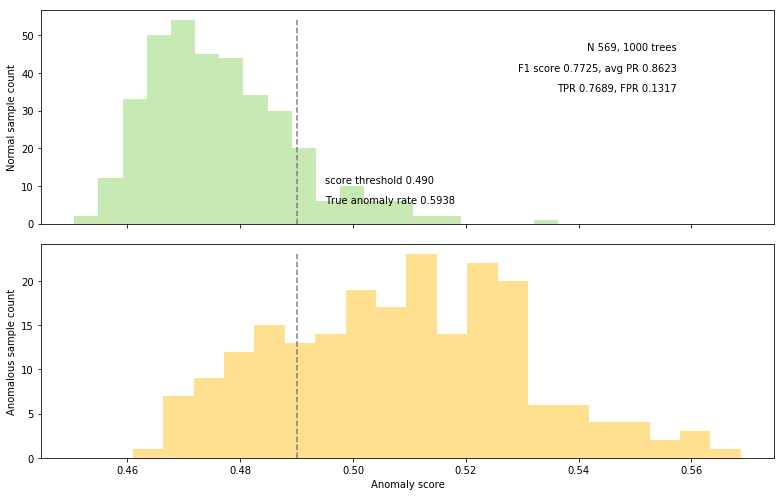

In [14]:
plot_anomalies(X, y, desired_TPR=0.75, sample_size=5, n_trees=1000)

### Noise=True, Improved=False

In [16]:
add_noise(df, 5)
X, y = df.drop('diagnosis', axis=1), df['diagnosis']

In [17]:
X.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,noise_0,noise_1,noise_2,noise_3,noise_4
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.6656,0.7119,0.2654,0.4601,0.11890,-10.175557,210.685811,-111.653466,4.179350,-18.236821
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.1866,0.2416,0.1860,0.2750,0.08902,-28.059728,-82.150865,132.452274,102.888993,-22.935660
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.4245,0.4504,0.2430,0.3613,0.08758,133.353338,17.075462,67.124092,158.914237,193.270948


fit time 0.10s
score time 1.20s
Computed 0.7500 TPR threshold 0.4850 with FPR 0.2213
[[278  79]
 [ 41 171]]
Proportion anomalies/normal = 212/357 = 59.4%
F1 score 0.7403, avg PR 0.8561


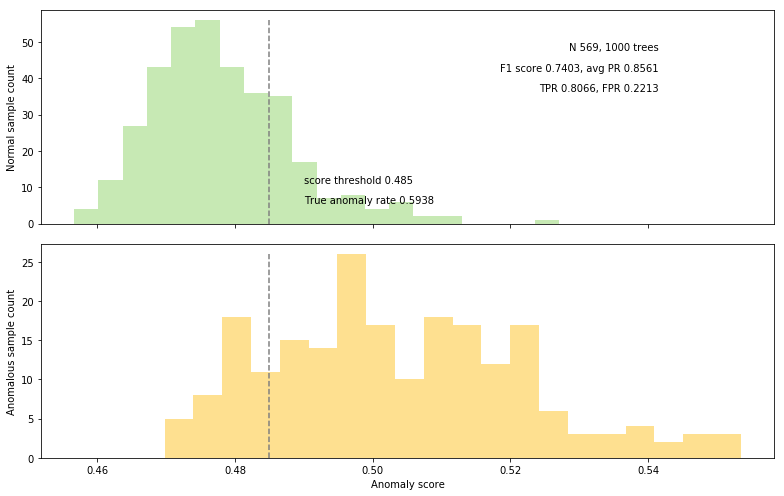

In [18]:
plot_anomalies(X, y, desired_TPR=0.75, sample_size=5, n_trees=1000)

After adding noise, the false positive rate increased from 0.1317 to 0.2213.

### Noise=True, Improved=True

fit time 0.41s
score time 1.26s
Computed 0.7500 TPR threshold 0.4900 with FPR 0.1849
[[291  66]
 [ 52 160]]
Proportion anomalies/normal = 212/357 = 59.4%
F1 score 0.7306, avg PR 0.8134


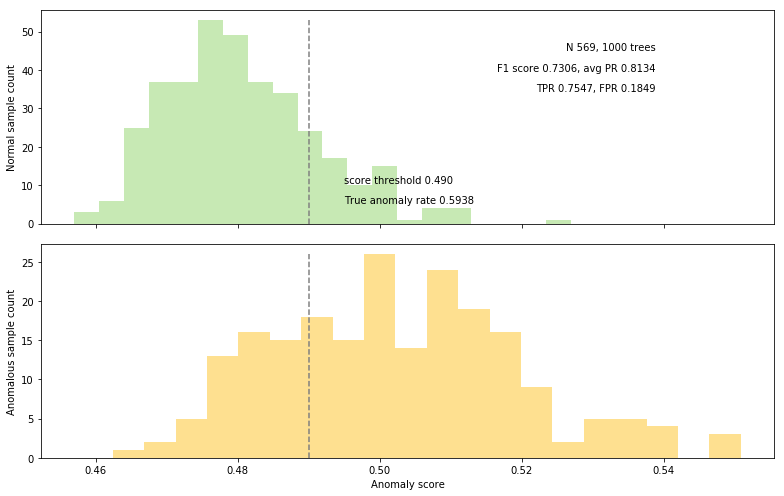

In [21]:
plot_anomalies(X, y, desired_TPR=0.75, sample_size=5, n_trees=1000, improved=True)

Using the improved methods with the noisy data brings the false positive rate back down from 0.2213 to 0.1849.